# Regression

## Simple Linear Regression

$Y=\beta_0+\beta_1 x + e$

- $Y$ represents the dependent variable or the variable we are trying to predict or explain.
- $x$ represents the independent variable or the predictor variable.
- $\beta_0$ is the intercept of the regression line, which is the predicted value of $Y$ when $x$ is zero.
- $\beta_1$ is the slope of the regression line, representing the average change in $Y$ for a one-unit change in $x$.
- $e$ stands for the error term (also known as the residual), which is the difference between the observed values and the values predicted by the model.

![image.png](./img/05.png)


In [1]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Generate some random data for demonstration
np.random.seed(0) # Seed for reproducibility
x = np.random.rand(100, 1) # 100 random numbers for independent variable
y = 2 + 3 * x + np.random.randn(100, 1) # Dependent variable with some noise

# Create a linear regression model
model = LinearRegression()

# Fit the model with our data (x - independent, y - dependent)
model.fit(x, y)

# Print the coefficients
print("Intercept (beta_0):", model.intercept_)
print("Slope (beta_1):", model.coef_)

Intercept (beta_0): [2.22215108]
Slope (beta_1): [[2.93693502]]


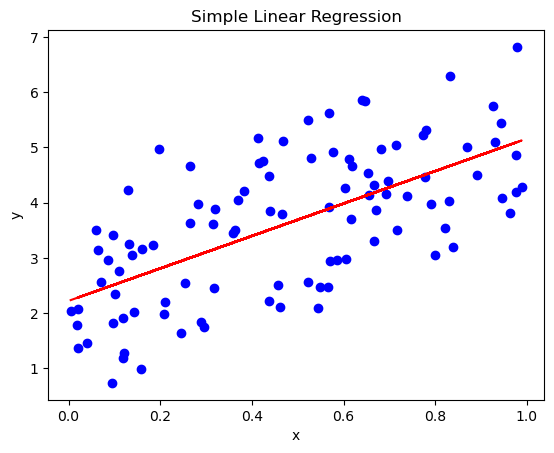

In [3]:
# Use the model to make predictions
y_pred = model.predict(x)

# Plotting
plt.scatter(x, y, color='blue') # actual data points
plt.plot(x, y_pred, color='red') # our model's predictions
plt.title('Simple Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Find Best estimator of $\beta_1$

#### Ordinary Least Squares

- The goal is to find the values of $\beta_0$ and $\beta_1$ that minimize the sum of the squared differences (residuals) between the observed values and the values predicted by the linear model.
- $Minimize(e) = (\sum (y_i-(\beta_0+\beta_1 x_i))^2)$, where $y_i$ and $x_i$ are the observed values.

- Steps to calculate it

1. Calculate the partial derivatives of intercept $\beta_0$ and let it equal to 0
   - $\frac{\partial e}{\partial \beta_0}=\sum_i 2(y_i-\beta_0-\beta_i x_i)(-1) = 0$
   - $\frac{\partial e}{\partial \beta_0}= \sum_i \beta_1 x_i -n*\beta_0 -\sum_i y_i =0$
   - $\sum_i \beta_1 x_i +n*\beta_0 -\sum_i y_i =0 \to n*\beta_1\bar x +n*\beta_0-n*\bar y = 0$
   - $ n*\beta_1\bar x +n*\beta_0-n\*\bar y = 0 \to \beta_1\bar x + \beta_0-\bar y = 0$
   - $\beta_1\bar x + \beta_0-\bar y = 0 \to \beta_0=\bar y - \beta_1 \bar x$
2. Calculate the partial derivative of slope $\beta_1$ and let it equal to 0

   - $\frac{\partial e}{\partial \beta_1} = \sum_i2(y_i-\beta_1 x_i -\beta_0) (-x_i) =0$
   - $\sum_i2(y_i-\beta_1 x_i -\beta_0) (-x_i) =0 \to \sum_i(\beta_1x_i^2+\beta_0 x_i -x_i y_i)=0$
   - Replace $\beta_0$ with $(\bar y - \beta_1 \bar x)$ : $\sum_i(\beta_1x_i^2+(\bar y -\beta_1 \bar x) x_i -x_i y_i)=0$
   - $\beta_1(\sum_i x_iy_i-\bar y \sum_i x_i) = \sum_i x_i^2-\bar x\sum_i x_i \to \beta_1 = \frac{\sum_i x_iy_i-\bar y \sum_i x_i}{\sum_i x_i^2-\bar x\sum_i x_i}$
   - According to the Summation Property (As shown below):

   ![image.png](./img/06.png)

   - We will have $\beta_1=\frac{Cov(X,Y)}{Var(X)}$


### Assessing the Accuracy of Coefficient Estimates

- $SE(\beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x-\bar x)^2}$
- $SE(\beta_0)^2 = \sigma^2[\frac{1}{n}+\frac{\bar x^2}{\sum_{i=1}^n(x_i-\bar x)^2}]$
  - Where $\sigma^2 = Var(e)$
- These two standard errors can be used to compute `confidence interval`, for example, for 95% confidence interval, it has the form
  [$\beta_1 - 2*SE(\beta_1)$, $\beta_1 + 2*SE(\beta_1)$]

### Hypothesis Testing

- Standard errors can be used to perform `hypothesis tests` on coefficients.
- To test the null hypothesis, we compute a `t-statistic`, given by  
   $t=\frac{\beta_1-0}{SE(\beta_1)}$
  - This value follows a t-distribution with `n-2` degrees of freedom
  - $H_0$ assumes $\beta_1 = 0$
  - Since $H_0:\beta_1 = 0$, [$\beta_1 - 2*SE(\beta_1)$, $\beta_1 + 2*SE(\beta_1)$] should not contain 0

![image.png](./img/07.png)


### Assessing the Overall Accuracy of the Model

- We compute the `Residual Standard Error`

  $RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_i^n(y_i-\hat y_i)^2}$

  - Where RSS is the `residual sum-of-squares`

- We can also use `R-squared` (fraction of variance explained):

  $R^2 = \frac{TSS-RSS}{TSS}=1-\frac{RSS}{TSS}$

  - Where $ TSS=\sum\_{i=1}^n(y_i -\bar y)^2$, is the `total sum of squares`
  - Also, In the simple linear regression setting, $R^2 = r^2$ where $r$ is the correlation between $X$ and $Y$:

  $r=\frac{\sum_{i=1}^2(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^2(x_i-\bar x)^2}\sqrt{\sum_{i=1}^2(y_i-\bar y)^2}}$

  ![image.png](./img/11.png)


In [28]:
# Example data
x = np.array([1., 2., 3., 4., 5.]).reshape(-1, 1)
y = np.array([2., 4., 5., 8., 7.])

# Calculating means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculating Beta_1
numerator = sum([i*j for i,j in zip(x-x_mean,y-y_mean)])
denominator = np.sum((x - x_mean)**2)
beta_1 = numerator / denominator

print("Beta_1 (slope) using OLS:", beta_1)

Beta_1 (slope) using OLS: [1.4]


### Maximum likelihood estimation

- In the context of linear regression, **MLE assumes that the residuals** (differences between observed and predicted values) **are normally distributed**.
- The method finds the parameter values that maximize the likelihood of observing the given data.


## Multiple Linear Regression

$Y=\beta_0+\beta_1 X_1+\beta_2 X_2+...+\beta_p X_p + e$

- Correlations amongst predictors cause problems (`multicollinearity`):
  - The `variance of all coefficient` tends to increase, sometimes dramatically.
  - $t=\frac{\beta_1-0}{SE(\beta_1)}$, If $SE(\beta_1)$ becomes larger, will contributes to a $t$ closer to 0, which will lead to a larger `p-value`
  - Also, it's hard to interpret.
- `Claims of causality` should be **avoided**!

![image.png](./img/09.png)

![image.png](./img/10.png)


### Important Question (Hypothesis testing)

1. Is at least one of the predictors $X_1,X_2,...,X_p$ useful in predicting the response?

   - For this question, we use the $F-statistic$
   - $F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)}$~$F_{p,n-p-1}$
     - Where $n$ is the number of observations, $p$ is the number of predictors
   - $H_0:$ None of these predictors are useful

   ![image.png](./img/12.png)

   - If $H_0$ is false, we expect $F>1$

2. Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?

   - **Forward Selection**
     - Begin with the `null model`
     - Fit `p` simple linear regression and add the null model the variable results in the **lowest `RSS`**
     - Add to that model the variable that results in the lowest `RSS` amongst all two-variable models.
     - Continue until stopping rules is satisfied (e.g. `p-value >0.05` for all remaining variables)
   - **Backward Selection**

   ![image.png](./img/13.png)

   - Model Selection
     - Besides `RSS`, there are some other criteria for choosing an "optimal" member in stepwise searching, including `Akaike information criterion (AIC)`, `Bayesian information criterion (BIC)`, `adjusted R-squared`

3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction?


### Polynomial regression (non-linear effects)

![image.png](./img/14.png)

![image.png](./img/15.png)


## Interesting Quotes by famous Statisticians

- _Essentially, all models are wrong, but some are useful_
  - George Box
- _The only way to find out what will happen when a complex system is disturbed is to disturb the system, not merely to observe it passively_
  - Fred Mosteller and John Tukey, paraphrasing George Box
